**Arrhythmia:**

1- (75.95% ± 2.2%) Bagging   
2- (70.89% ± 1.2%) GradientBoost  
3- (69.22% ± 2.0%) RandomForest  
4- (65.47% ± 1.8%) DecisionTree  
5- (61.43% ± 1.6%) AdaBoost  
For Arrhythmia, Bagging achieved the best results during 5 repetitions of 5-fold cross-validation, with a mean accuracy of 75.95% ± 2.2%  
The model has a similar average performance over 5 test sets, with a mean accuracy of 73.09% ± 6%

**Caesarian:**

1- (61.10% ± 4.3%) GradientBoost  
2- (60.51% ± 1.7%) AdaBoost   
3- (57.89% ± 5.5%) RandomForest  
4- (54.77% ± 5.8%) DecisionTree  
5- (54.23% ± 3.7%) Bagging  
For Caesarian, GradientBoost achieved the best results (61.10% ± 4.3%), closely followed by AdaBoost (60.51% ± 1.7%)  
Between the two, GradientBoost takes the win on the 5-test-set averages (57.5% ± 8.1%) vs (53.75% ± 11.4%)  

**Phishing:**

1- (96.65% ± 0.3%) RandomForest   
2- (96.52% ± 0.0%) Bagging  
3- (95.92% ± 0.5%) DecisionTree  
4- (92.93% ± 0.1%) AdaBoost  
5- (91.77% ± 0.0%) GradientBoost  
For Phishing, RandomForest achieved the best results (96.67% ± 0.3%), closely followed by Bagging (96.52% ± 0.2%)  
The two algorithms performs very similarly over the 5 test sets at 96.8% ± 0.5%

**SKLearn - Breast Cancer:**

1- (95.34% ± 0.1%) RandomForest   
2- (95.03% ± 0.1%) AdaBoost  
3- (94.59% ± 0.1%) Bagging  
4- (94.15% ± 0.1%) GradientBoost  
5- (92.04% ± 0.1%) DecisionTree  
For Cancer, RandomForest achieved the best results (95.34% ± 0.6%), closely followed by AdaBoost, Bagging, and GradientBoost  
RandomForest is still the top performer over 5 the test sets (95.08% ± 2.3%)

**Experimental Design:**

Firstly, the column ‘J’ has been dropped from the arrhythmia dataset as it is majority ?’s. After dropping this column, all rows that contain a ? Are also dropped as part of data-preprocessing. This is the only dataset that contains missing information, all other datasets have been simply imported and stripped of whitespace.

For all 4 of the datasets, I am repeating the below experiments 5 times using unique seeds to reduce randomness. For each of the repetitions, I am splitting train/test data with a 80:20 ratio and fitting the model on the training set.  

I then collect the performance of the trained model on the test dataset to calculate the mean + standard deviation (std) of test set performance

With the training set, I am also running 5-fold cross-validation and calculating the mean + std. This allows me to monitor the relationship between CV performance and test set performance to gain an understanding of their correlation.

Once I have collected all the data into the CV performance data frame and test performance data frame, I run autorank on both with a plot and compare the results.

Originally I thought 1 repetition of 5-fold CV was sufficient, however after reading the suggested text I decided to change my approach to 5-repetitions of 5-fold CV as well as including test set performance. In retrospect that may have not been needed as the test set performance simply confirmed the results of the 5-fold CV.

Note that the dataset I chose for task 3 supported my hypothesis originally, however upon repeating the experiment with 5 different seeds the results no longer met the criteria for task 3. I ran out of time while searching for another dataset so left the 4th dataset in my code.

Bagging achieved the best results for the Arrhythmia dataset. As this is a large dataset with over 100 features, I think the existence of outliers may have reduced the performance of Boosting-based methods as they are more sensitive to noise in data. As this is clearly an imbalanced dataset (most of the data is class = 1), the randomness from bagging contributed to its increased performance in this scenario.

GradientBoost achieved the best results for the Caesarian dataset. In comparison Bagging performed the worst for this dataset. This tells me that the features are highly correlated with each-other and contain features that are strong, as Boosting-based algorithms are incremental upon the previous iterations. Weak learners also work better when the dataset is smaller, as this is the smallest dataset, it is no surprise that Boosting-based algorithms were able to top the performance charts.

RandomForest performed the best for the Phishing dataset. I think this is the case because it is a binary classification problem and random forests excels in the given context. The results were almost tied between bagging, trees, and forest methods, which means the classifiers were quite strong already. The model is unlikely to have been overfitted as Bagging scored very close to RandomForests.

RandomForest performed the best for the Cancer dataset.

**Conclusion:**

Overall I think Random Forest performs the most consistently as it always performs at the average rate or better. It is not prone to overfitting or noisy data and it has never placed last out of all the experimental designs that I’ve carried out. Diversity between trees is increased by the random selection of nodes when creating the trees. This decreases the overall variance of the diversity and produces a more accurate final result.

In [1]:
import os

import numpy as np
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from autorank import autorank,create_report, plot_stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reload local python files every 2 seconds

%load_ext autoreload
%autoreload 2

In [3]:
arrhythmia = pd.read_csv("arrhythmia.csv", skipinitialspace=True)
caesarian = pd.read_csv("caesarian.csv", skipinitialspace=True)
phishing = pd.read_csv("website-phishing.csv", skipinitialspace=True)
cancer = load_breast_cancer()

arrhythmia = arrhythmia.drop(['J'], axis = 1)
arrhythmia = arrhythmia.replace("?", np.nan).dropna().astype(float)

phishing.columns = phishing.columns.str.strip()

X_list = []
y_list = []

X_list.append(arrhythmia.drop('class', axis=1))
y_list.append(arrhythmia['class'])

X_list.append(caesarian.drop('class', axis=1))
y_list.append(caesarian['class'])

X_list.append(phishing.drop('Class', axis=1))
y_list.append(phishing['Class'])

X_list.append(cancer.data)
y_list.append(cancer.target)

Arrhythmia: applying 5 algorithms using seed 111
Arrhythmia: applying 5 algorithms using seed 222
Arrhythmia: applying 5 algorithms using seed 333
Arrhythmia: applying 5 algorithms using seed 444
Arrhythmia: applying 5 algorithms using seed 555
-------
Mean of 5-fold CV on the training set
  DecisionTree RandomForest  AdaBoost   Bagging GradientBoost
1     0.669666     0.702371  0.628007  0.767998      0.720237
2     0.642888      0.71137  0.630992  0.779895      0.687401
3     0.675505     0.705136  0.589377  0.755882      0.714399
4     0.651712     0.663608  0.613169  0.770852      0.714267
5     0.633889     0.678534  0.610097   0.72309      0.708209
       DecisionTree  RandomForest  AdaBoost   Bagging  GradientBoost
count      5.000000      5.000000  5.000000  5.000000       5.000000
mean       0.654732      0.692204  0.614328  0.759543       0.708903
std        0.017595      0.020264  0.016633  0.022112       0.012750
min        0.633889      0.663608  0.589377  0.723090       0

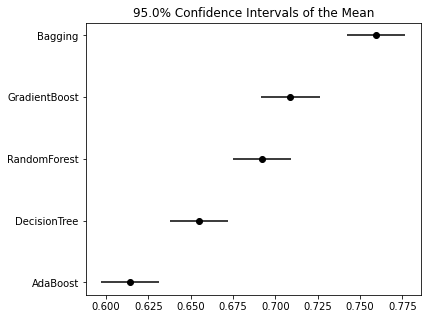

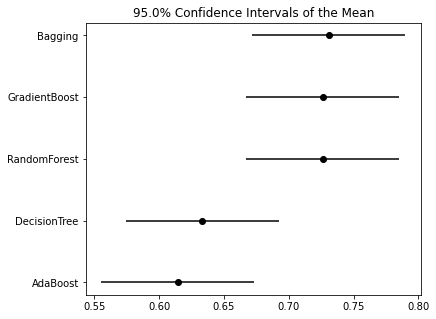

Caesarian: applying 5 algorithms using seed 111
Caesarian: applying 5 algorithms using seed 222
Caesarian: applying 5 algorithms using seed 333
Caesarian: applying 5 algorithms using seed 444
Caesarian: applying 5 algorithms using seed 555
-------
Mean of 5-fold CV on the training set
  DecisionTree RandomForest  AdaBoost   Bagging GradientBoost
1     0.566667     0.566667  0.611538  0.517949      0.597436
2     0.625641     0.674359  0.612821  0.565385      0.658974
3     0.548718     0.532051  0.597436  0.502564      0.629487
4     0.530769     0.562821  0.579487  0.594872      0.624359
5     0.466667     0.558974  0.624359  0.530769      0.544872
       DecisionTree  RandomForest  AdaBoost   Bagging  GradientBoost
count      5.000000      5.000000  5.000000  5.000000       5.000000
mean       0.547692      0.578974  0.605128  0.542308       0.611026
std        0.057638      0.055028  0.017224  0.037422       0.042950
min        0.466667      0.532051  0.579487  0.502564       0.5448

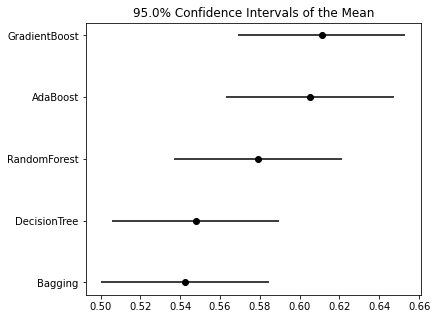

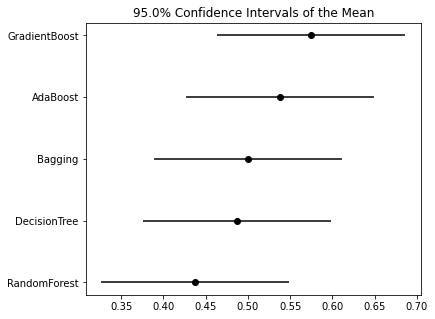

Phishing: applying 5 algorithms using seed 111
Phishing: applying 5 algorithms using seed 222
Phishing: applying 5 algorithms using seed 333
Phishing: applying 5 algorithms using seed 444
Phishing: applying 5 algorithms using seed 555
-------
Mean of 5-fold CV on the training set
  DecisionTree RandomForest  AdaBoost   Bagging GradientBoost
1     0.965966     0.968792  0.927973  0.968905      0.917797
2     0.954093     0.964495  0.929443  0.963591      0.917232
3     0.961217     0.967323  0.930462  0.963818      0.918589
4     0.957711     0.963365  0.929557  0.964383      0.918476
5     0.957373     0.969019  0.929331  0.965401       0.91678
       DecisionTree  RandomForest  AdaBoost   Bagging  GradientBoost
count      5.000000      5.000000  5.000000  5.000000       5.000000
mean       0.959272      0.966599  0.929353  0.965219       0.917775
std        0.004513      0.002553  0.000892  0.002176       0.000781
min        0.954093      0.963365  0.927973  0.963591       0.916780
25

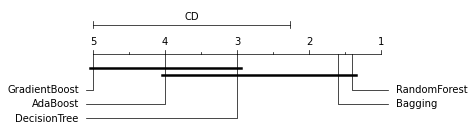

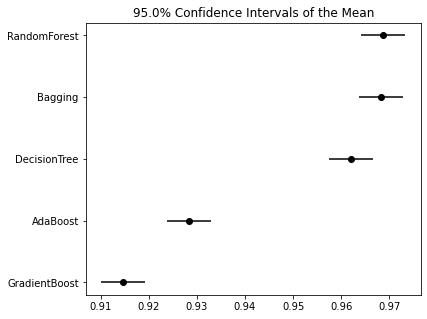

Cancer: applying 5 algorithms using seed 111
Cancer: applying 5 algorithms using seed 222
Cancer: applying 5 algorithms using seed 333
Cancer: applying 5 algorithms using seed 444
Cancer: applying 5 algorithms using seed 555
-------
Mean of 5-fold CV on the training set
  DecisionTree RandomForest  AdaBoost   Bagging GradientBoost
1      0.90989     0.949451  0.945055  0.936264      0.942857
2     0.925275     0.949451  0.949451  0.951648      0.947253
3     0.920879     0.953846  0.969231  0.951648      0.920879
4     0.923077     0.949451  0.938462  0.942857      0.945055
5     0.923077     0.964835  0.949451  0.947253      0.951648
       DecisionTree  RandomForest  AdaBoost   Bagging  GradientBoost
count      5.000000      5.000000  5.000000  5.000000       5.000000
mean       0.920440      0.953407  0.950330  0.945934       0.941538
std        0.006099      0.006666  0.011483  0.006520       0.011998
min        0.909890      0.949451  0.938462  0.936264       0.920879
25%        0

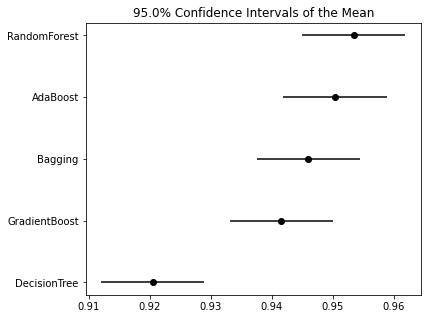

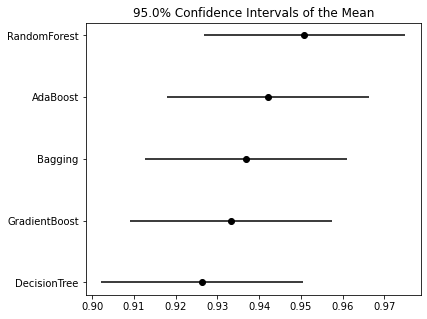

In [4]:
RANDOM_SEEDS = [111, 222, 333, 444, 555]

clf_names = ["DecisionTree", "RandomForest", "AdaBoost", "Bagging", "GradientBoost"]

data_names = [1,2,3,4]
datasets = [arrhythmia, caesarian, phishing, cancer]
ds_name = ['Arrhythmia', 'Caesarian', 'Phishing', 'Cancer']

results = pd.DataFrame(index = data_names, columns = clf_names)
results_test = pd.DataFrame(index = data_names, columns = clf_names)

for i, data in zip(data_names, datasets): #for every dataset
    
    for J in range(0,5): #for every seed
        np.random.seed(RANDOM_SEEDS[J])

        X_train, X_test, y_train, y_test = train_test_split(X_list[i-1], y_list[i-1], test_size=0.2, random_state=RANDOM_SEEDS[J])
        
        classifiers = [
            DecisionTreeClassifier(random_state=RANDOM_SEEDS[J]),
            RandomForestClassifier(n_estimators=10, random_state=RANDOM_SEEDS[J]),
            AdaBoostClassifier(n_estimators=10, random_state=RANDOM_SEEDS[J]),
            BaggingClassifier(n_estimators=10, random_state=RANDOM_SEEDS[J]),
            GradientBoostingClassifier(n_estimators=10, random_state=RANDOM_SEEDS[J])
        ]
        
        print('%s: applying 5 algorithms using seed %s' % (ds_name[i-1],str(RANDOM_SEEDS[J])))
        for clf_name, clf in zip(clf_names, classifiers):
            clf.fit(X_train, y_train)
            res = cross_val_score(estimator = clf, X=X_train, y=y_train, cv=5)
            results.at[J+1, clf_name] = res.mean()
            results_test.at[J+1, clf_name] = clf.score(X_test, y_test)
    print('-------')

    print('Mean of 5-fold CV on the training set')
    print(results)
    print(results.astype('float64').describe(include='all'))
    print('-------')
    print('Score of the model on test set')
    print(results_test)
    print(results_test.astype('float64').describe(include='all'))
    print('Autorank for %s' % ds_name[i-1])
    
    res = autorank(results.astype('float64'), verbose = False)
    res_test = autorank(results_test.astype('float64'), verbose = False)
    create_report(res)
    create_report(res_test)
    plot_stats(res, allow_insignificant = True)
    plt.show()
    plot_stats(res_test, allow_insignificant = True)
    plt.show()
    
